<a href="https://colab.research.google.com/github/GitHub-Bong/Toxic-Comment-Challenge/blob/master/0403_preprocessed_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preprocessing**
- Capitalization / Lower case
- Expand the Contractions
- Remove URLs
- Remove HTML tags
- Remove Non-ASCI
- Remove punctuations
- Capitalization / Lower case
- Remove stopwords
<br/>
<br/>

**Before Preprocessing**   
<br/>

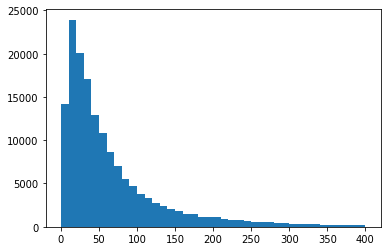

<br/>
<br/>

**After Preprocessing**       

<br/>          
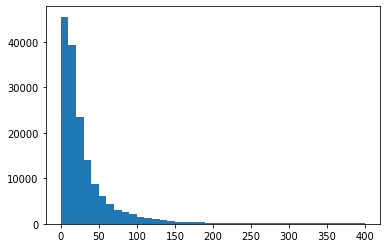

<br/>
<br/>

**Embedding**      
Pretrained Word Embedding      
'glove.twitter.27B.200d.txt'     
<br/>     
      

**Padding**      
len 100      
<br/>
       
**Model**       

Input()     
x = Embedding()(inp)       
x = SpatialDropout1D(0.2)(x)       
x = Bidirectional(GRU(60, return_sequences=True))(x)     
avg_pool = GlobalMaxPooling1D()(x)     
max_pool = GlobalAveragePooling1D()(x)      
conc = concatenate([avg_pool, max_pool])      
x = Dense(50, activation="relu")(conc)      
x = Dropout(0.1)(x)     
x = Dense(6, activation="sigmoid")(x)       
      
     
<br/>      
Total params: 48,271,676      
Trainable params: 106,676      
Non-trainable params: 48,165,000       

<br/>         
batch_size = 64      
epochs = 10      
validation_split=0.2      

<br/>
 
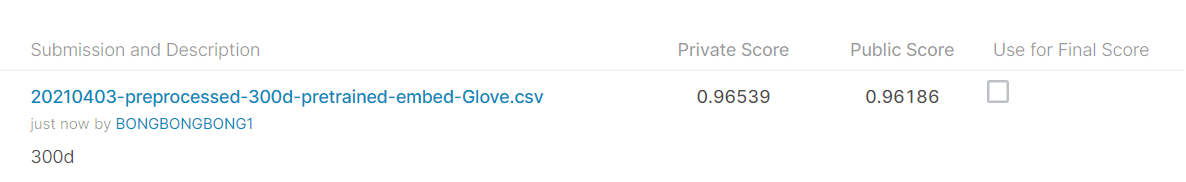

# Mount, Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import sys, os, re, string, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, SpatialDropout1D, concatenate
from tensorflow.keras.layers import GRU, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

---------------

# Load Data

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/train.csv/train.csv')
test = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/test.csv/test.csv')

In [ ]:
train.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0


In [ ]:
train.isnull().any(), test.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool, id              False
 comment_text    False
 dtype: bool)

------------

# Preprocessing

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


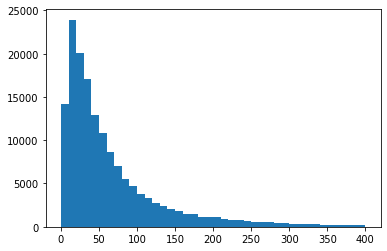

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

totalNumWords = [len(one_comment) for one_comment in train["comment_text"].apply(word_tokenize)]
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

In [ ]:
train["comment_text"][np.argmax(totalNumWords)]

'YOU!\nYou blocked me worm why!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
del totalNumWords

In [ ]:
# Capitalization / Lower case
train["preprocessed_text"] = train["comment_text"].apply(lambda x: x.lower())
test["preprocessed_text"] = test["comment_text"].apply(lambda x: x.lower())

# Expand the Contractions
!pip install contractions
import contractions

train["preprocessed_text"] = train["preprocessed_text"].apply(lambda x: contractions.fix(x))
test["preprocessed_text"] = test["preprocessed_text"].apply(lambda x: contractions.fix(x))

# Remove URLs
train["preprocessed_text"] = train["preprocessed_text"].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", "", x))
test["preprocessed_text"] = test["preprocessed_text"].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", "", x))

# Remove HTML tags
train["preprocessed_text"] = train["preprocessed_text"].apply(lambda x: re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});", "", x))
test["preprocessed_text"] = test["preprocessed_text"].apply(lambda x: re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});", "", x))

# Remove Non-ASCI
train["preprocessed_text"] = train["preprocessed_text"].apply(lambda x: re.sub(r'[^\x00-\x7f]','', x))
test["preprocessed_text"] = test["preprocessed_text"].apply(lambda x: re.sub(r'[^\x00-\x7f]','', x))

# Remove special characters


# Remove punctuations
train["preprocessed_text"] = train["preprocessed_text"].apply(lambda x: re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", x))
test["preprocessed_text"] = test["preprocessed_text"].apply(lambda x: re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", x))

# Capitalization / Lower case
train["preprocessed_text"] = train["preprocessed_text"].apply(lambda x: x.lower())
test["preprocessed_text"] = test["preprocessed_text"].apply(lambda x: x.lower())

# Remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['preprocessed_text'] = train['preprocessed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['preprocessed_text'] = test['preprocessed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

     |████████████████████████████████| 327kB 7.0MB/s 
     |████████████████████████████████| 266kB 11.3MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85392 sha256=f27f570919c1d20956018701b11326cd495e9f28ef888922ea896e6cf403434c
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


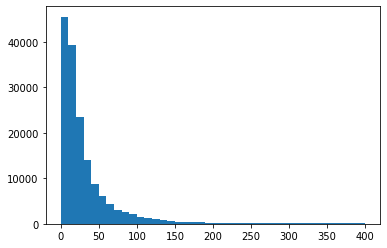

In [ ]:
totalNumWords = [len(one_comment) for one_comment in train["preprocessed_text"].apply(word_tokenize)]
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

In [ ]:
0 in totalNumWords

False

In [ ]:
totalNumWords.index(1) 

55751

In [ ]:
totalNumWords.index(1,55752,)

111438

In [ ]:
print(train["comment_text"][55751])
print(train["comment_text"][111438])

Complaints/Mistakes
|needs-infobox=yes


In [ ]:
list_sentences_train = train["preprocessed_text"] # (159571,)
list_sentences_test = test["preprocessed_text"] # (153164,)

-------------

# Tokenization

In [ ]:
max_features = 30000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list_sentences_train)
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
# list_tokenized_train[:1] = [[688,75,1,126,130, ,,, ]]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# list_tokenized_test[:1] = [[2665,655,8849,656, ,,, ]]

# tokenizer.word_counts = OrderedDict([('explanation', 1771),('why', 17818),('the', 496540),('edits', 9957), ,,, ])
# tokenizer.word_index = {'the': 1,'to': 2,'of': 3,'and': 4, ,,, }

In [ ]:
len(tokenizer.word_index)

240825

-------------

# Padding

In [ ]:
maxlen = 100
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen) # (159571, 100)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen) # (153164, 100)

In [ ]:
X_t.shape

(159571, 100)

In [ ]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values # y.shape (159571, 6)
y.shape

(159571, 6)

# Pretrained-Embedding-matrix


In [ ]:
embedding_dict = dict()
f = open('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/glove.twitter.27B.200d.txt/glove.twitter.27B.200d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100
    embedding_dict[word] = word_vector_arr
f.close()
print('There are %s Embedding Vectors\n' % len(embedding_dict))

print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 200)) # will delete first row

for word, i in tokenizer.word_index.items(): 
    temp = embedding_dict.get(word) 
    if temp is not None:
        embedding_matrix[i] = temp 

print(embedding_matrix.shape)
embedding_matrix = np.delete(embedding_matrix,0,axis=0) # delete first row
print(embedding_matrix.shape)

There are 1193514 Embedding Vectors

[-6.4748e-01 -3.7296e-01 -3.6128e-01  7.9975e-01 -2.1890e-01  7.6152e-01
 -7.3698e-02  2.2635e-01 -7.5429e-02  6.3600e-01 -6.5914e-01 -5.1787e-01
 -6.4411e-02 -3.0796e-01  4.4071e-01  1.4543e-01 -9.9792e-02 -2.3253e-01
  2.0882e-01 -9.3256e-02 -2.9659e-01 -1.6643e-01 -1.3184e-01 -5.5247e-01
 -6.0625e-01  9.6745e-01  3.8410e-01 -1.4236e-02  2.8774e-01  7.5652e-01
  1.1552e-01 -4.9894e-01 -9.2585e-02 -6.7708e-02  3.1373e-01  5.6426e-01
  1.9797e-01  4.0703e-02  2.7106e-01 -3.3045e-01  3.9652e-01  1.3718e-01
  5.0194e-01  3.7811e-01  2.9139e-01  2.6001e-01  2.9927e-01  3.6737e-01
  1.0638e-01  3.7086e-01  2.3767e-02  6.4266e-01 -2.4067e-01 -3.1749e-01
 -3.4070e-01  9.3053e-01  1.8900e-01 -2.7260e-01 -3.5132e-01  1.4086e-01
 -1.6232e-01  8.7983e-03 -8.7401e-02 -1.2887e-01  2.5303e-01  9.0737e-01
 -3.3149e-01  5.8059e-02 -2.3855e-01  3.5351e-01 -3.8560e-01 -4.6745e-01
 -2.2487e-01 -1.9058e-01  3.4685e-02  4.1231e-01  9.3602e-02  2.0409e-01
 -2.4806e-01  

In [ ]:
np.save('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0403-preprocessing-200d-pretrained-embed-Glove.npy',embedding_matrix)

---------

# Model

In [ ]:
inp = Input(shape=(maxlen, )) #maxlen=100
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],
              weights=[embedding_matrix],trainable=False)(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(60, return_sequences=True))(x)
avg_pool = GlobalMaxPooling1D()(x)
max_pool = GlobalAveragePooling1D()(x)
conc = concatenate([avg_pool, max_pool])
x = Dense(50, activation="relu")(conc)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     48165000    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 100, 200)     0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 100, 120)     94320       spatial_dropout1d[0][0]          
______________________________________________________________________________________________

----------

# Training

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
#checkpoint
checkpoint = ModelCheckpoint(filepath='/content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0403-preprocessed-300d-pretrained-embed-Glove.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 64
epochs = 10
hist = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint], validation_split=0.2)

Epoch 1/10
1995/1995 [==============================] - 31s 14ms/step - loss: 0.1315 - accuracy: 0.7612 - val_loss: 0.0669 - val_accuracy: 0.9941

Epoch 00001: val_loss improved from inf to 0.06691, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0403-preprocessed-300d-pretrained-embed-Glove.hdf5
Epoch 2/10
1995/1995 [==============================] - 28s 14ms/step - loss: 0.0682 - accuracy: 0.9916 - val_loss: 0.0615 - val_accuracy: 0.9941

Epoch 00002: val_loss improved from 0.06691 to 0.06152, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0403-preprocessed-300d-pretrained-embed-Glove.hdf5
Epoch 3/10
1995/1995 [==============================] - 28s 14ms/step - loss: 0.0614 - accuracy: 0.9941 - val_loss: 0.0577 - val_accuracy: 0.9941

Epoch 00003: val_loss improved from 0.06152 to 0.05768, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0403-preprocessed-300d-pretrained-embed-Glove.hdf5
Epoch 4/10
1995/1995 [====

--------------

# Prediction

In [ ]:
sample_submission = pd.read_csv("/content/drive/Shareddrives/SOGANG Parrot/sample_submission.csv/sample_submission.csv")

sample_submission[list_classes] = model.predict(X_te)

sample_submission.to_csv("/content/drive/Shareddrives/SOGANG Parrot/All-submission/20210403-preprocessed-300d-pretrained-embed-Glove.csv", index=False)

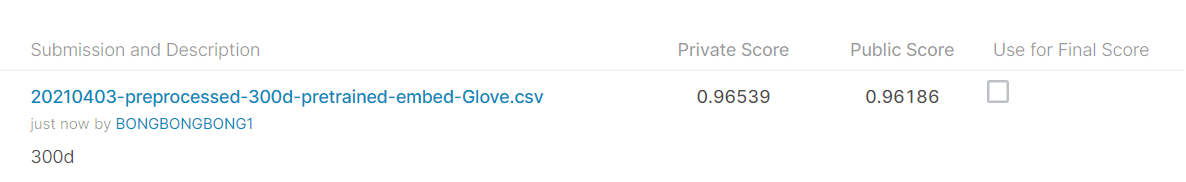

# TO-DO

In [ ]:
test[test["preprocessed_text"].str.len()==0]

,id,comment_text,preprocessed_text
34,000d4f120d5a7303,일이삼사오육칠팔구하고십이요 에헤헤 으헤 으헤 으허허,
114,002c586b0af3792c,পরিচয় \n\n নাম-মোঃফরহাদ ইসলাম \n পিতা-মোঃ শ...,
119,003044a2c35274b6,السلام عليكم و رحمة الله و بركاته الا الجميع \...,
404,00ad0323d9b31f21,"* I'll be there. ,",
419,00b568d3b0f61a37,Радченко ис мы дирты гаы анал сех славе!!,
...,...,...,...
152514,fee0b7add4cb49e3,حينما اكتب لك بالعربية كلامي يبقى وحين اكتب با...,
152562,fef5468c148e51d2,== دومین متن مباحثه با موضوع اختصاصی داعش و اس...,
152705,ff37eca3c02bb566,أسف أخي أي قبل الاسلام ، ولست عربية,
152819,ff6731195127887f,== 蹩脚英语 == \n 英语好烂呀！最近跟维基用户有事要说，无奈几乎不会英语，说不了话。...,


-----------------

-------------------------

# Only change pad len 100 -> 50

In [ ]:
maxlen = 50
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen) # (159571, 50)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen) # (153164, 50)

In [ ]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values # y.shape (159571, 6)
y.shape

(159571, 6)

In [ ]:
embedding_matrix=np.load('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0403-preprocessing-200d-pretrained-embed-Glove.npy')
embedding_matrix.shape

(240825, 200)

In [ ]:
inp = Input(shape=(maxlen, )) #maxlen=50
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],
              weights=[embedding_matrix],trainable=False)(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(60, return_sequences=True))(x)
avg_pool = GlobalMaxPooling1D()(x)
max_pool = GlobalAveragePooling1D()(x)
conc = concatenate([avg_pool, max_pool])
x = Dense(50, activation="relu")(conc)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 200)      48165000    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 50, 200)      0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 120)      94320       spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
#checkpoint
checkpoint = ModelCheckpoint(filepath='/content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0403-preprocessed-300d-change-padlen-pretrained-embed-Glove.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 64
epochs = 10
hist = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint], validation_split=0.2)

Epoch 1/10
1995/1995 [==============================] - 24s 10ms/step - loss: 0.1240 - accuracy: 0.8392 - val_loss: 0.0659 - val_accuracy: 0.9941

Epoch 00001: val_loss improved from inf to 0.06588, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0403-preprocessed-300d-change-padlen-pretrained-embed-Glove.hdf5
Epoch 2/10
1995/1995 [==============================] - 21s 11ms/step - loss: 0.0667 - accuracy: 0.9939 - val_loss: 0.0614 - val_accuracy: 0.9941

Epoch 00002: val_loss improved from 0.06588 to 0.06139, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0403-preprocessed-300d-change-padlen-pretrained-embed-Glove.hdf5
Epoch 3/10
1995/1995 [==============================] - 21s 10ms/step - loss: 0.0617 - accuracy: 0.9940 - val_loss: 0.0581 - val_accuracy: 0.9941

Epoch 00003: val_loss improved from 0.06139 to 0.05809, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0403-preprocessed-300d-change-padlen-pretrained-e

In [ ]:
sample_submission = pd.read_csv("/content/drive/Shareddrives/SOGANG Parrot/sample_submission.csv/sample_submission.csv")

sample_submission[list_classes] = model.predict(X_te)

sample_submission.to_csv("/content/drive/Shareddrives/SOGANG Parrot/All-submission/20210403-preprocessed-300d-change-padlen-pretrained-embed-Glove.csv", index=False)